In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

FILE = "data.xlsx"
df = pd.read_excel(FILE, header=0, sheet_name=0, index_col=0)
df

,голова,уши,нос,глаза,лоб,складка,губы,волосы,усы,борода,очки,родинка,бабочка,брови,серьга,трубка,class
№,,,,,,,,,,,,,,,,,
1,0,1,0,0,1,1,0,0,1,1,1,0,1,1,0,1,1
2,1,0,1,1,0,0,1,1,0,1,1,1,0,0,1,0,1
3,0,0,0,1,1,1,0,1,1,0,1,1,1,0,0,1,1
4,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1
5,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1
6,0,0,1,0,1,1,1,0,1,0,1,0,1,0,1,1,1
7,1,1,0,1,0,0,0,0,1,1,0,0,1,1,1,1,1
8,0,0,1,1,0,1,1,0,1,1,1,0,1,0,1,0,1
9,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0,1,2


In [2]:
x_headers = list(df.columns)
x_headers.remove('class')
x_headers

['голова',
 'уши',
 'нос',
 'глаза',
 'лоб',
 'складка',
 'губы',
 'волосы',
 'усы',
 'борода',
 'очки',
 'родинка',
 'бабочка',
 'брови',
 'серьга',
 'трубка']

In [56]:
X = df[x_headers]
y = df['class']
clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
clf.fit(X, y)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [60]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
node_values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "Бинарное дерево включает {n} узлов и имеет "
    "следующую структуру:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        if node_values[i][0][0]==0.:
            print(
                "{space}узел={node} является листом. Класс 2.".format(
                    space=node_depth[i] * "\t", node=i
                )
            )
        else:
            print(
                "{space}узел={node} является листом. Класс 1.".format(
                    space=node_depth[i] * "\t", node=i
                )
            )
    else:
        print(
            "{space}узел={node} является узлом решения: "
            "перейти к узлу {left} если отсутствует признак \"{feature}\", "
            "иначе перейти к узлу {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=x_headers[feature[i]],
                right=children_right[i],
            )
        )

Бинарное дерево включает 13 узлов и имеет следующую структуру:

узел=0 является узлом решения: перейти к узлу 1 если отсутствует признак "борода", иначе перейти к узлу 2.
	узел=1 является узлом решения: перейти к узлу 3 если отсутствует признак "складка", иначе перейти к узлу 4.
	узел=2 является узлом решения: перейти к узлу 5 если отсутствует признак "серьга", иначе перейти к узлу 6.
		узел=3 является листом. Класс 2.
		узел=4 является листом. Класс 1.
		узел=5 является узлом решения: перейти к узлу 7 если отсутствует признак "очки", иначе перейти к узлу 8.
		узел=6 является узлом решения: перейти к узлу 9 если отсутствует признак "глаза", иначе перейти к узлу 10.
			узел=7 является листом. Класс 2.
			узел=8 является листом. Класс 1.
			узел=9 является узлом решения: перейти к узлу 11 если отсутствует признак "трубка", иначе перейти к узлу 12.
			узел=10 является листом. Класс 1.
				узел=11 является листом. Класс 2.
				узел=12 является листом. Класс 1.


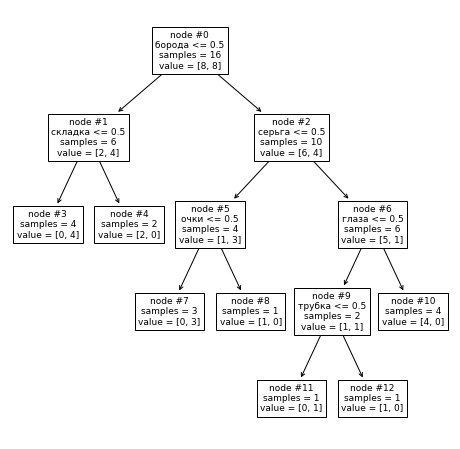

In [61]:
plt.figure("Decision Tree", figsize=[8,8])
tree.plot_tree(clf, feature_names=x_headers, impurity=False, node_ids=True)
plt.show()

In [59]:
test_sample = X.iloc[0:16]
clf.predict(test_sample)


array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2])